# One Layer Deep Learning Model From Scratch 

#### Map of the model 
- 1 Input Layer 
- 1 Output Layer 
- Activation Function

![Dribbble%20shot%20-%201.svg](https://raw.githubusercontent.com/rishabhdhayal/Deep-Learning/main/images/Dribbble%20shot%20-%201.svg)

## Importing Libraries

In [1]:
import numpy as np             # For numeric computation
import copy                    
import matplotlib.pyplot as plt         # Visualization
import h5py                             # To read .h5 files {Hierarchical Data Formats (HDF)}

## Loading Dataset  function

Function to load the data from the .h5 files [ Hierarchical Data Formats (HDF) ]

In [2]:
def load_dataset():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes


# Load Data

- loading data as test and train data 

In [3]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

![Dribbble%20shot%20-%203.svg](https://raw.githubusercontent.com/rishabhdhayal/Deep-Learning/948d8971a9d09cf22a349fae012aa21db1061266/images/Dribbble%20shot%20-%203.svg)

# Visialize an image

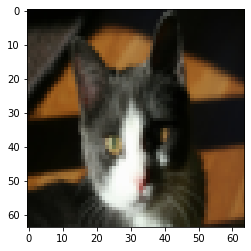

In [4]:
plt.imshow(train_set_x_orig[19])

## Flattening data

-  the original shape of the test x attriputes is (209, 64, 64, 3) = (number of images, img_length, img_height, channels)
- We flatten the shape in the form (209,12288) = (number of images, one image attributes)

In [5]:
train_set_x_orig.shape

(209, 64, 64, 3)

In [6]:
train_x = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_x = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T

In [7]:
train_x.shape

(12288, 209)

In [8]:
test_x.shape

(12288, 50)

In [9]:
train_set_y.shape

(1, 209)

In [10]:
test_set_y.shape

(1, 50)

## Standardize data

- standardize the data

![Dribbble%20shot%20-%204.svg](https://raw.githubusercontent.com/rishabhdhayal/Deep-Learning/main/images/Dribbble%20shot%20-%204.svg)

In [11]:
train_set_x = train_x/255
test_set_x = test_x/255

## Helper functions
- sigmoid activation function 

### Sigmoid   

In [12]:
def sigmoid(x):
    s = 1/(1+np.exp(-x))
    return s

### Initializing parameters

In [13]:
def initializing_parameters(dim):
    w = np.zeros((dim,1))
    b = np.zeros((1,1))
    
    return w,b

## Forward Propogation

In [14]:
def forward_propogation(w,b,x,Y):
    
    m = x.shape[1]
    
    z = np.dot(w.T,x) + b
    
    A = sigmoid(z)
    
    cost  =  (-1/m)*np.sum(Y* np.log(A) + (1 - Y)*np.log(1-A))
    
    dw = (1/m)* np.dot(x, (A-Y).T)
    db = (1/m) * np.sum(A - Y)
    
    grads = {"dw":dw,
            "db":db,}
    cost = np.array(cost)
    
    return grads , cost

## Back ward propogate and optamize on m images

In [15]:
def optimize(w,b,x,y,iterations,learning_rate):
    for i in range(iterations):
        grads, cost = forward_propogation(w,b,x,y)
        
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params , grads , cost

# Predict the output using parameters and input data

In [16]:
def predict(w,b,x):
    
    Y_prediction = np.zeros((1,x.shape[1]))
    
    a = sigmoid(np.dot(w.T,x) + b)
    
    for i in range(x.shape[1]):
        if a[0,i] < 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1
    return Y_prediction

# Assemble all functions to create the model

In [17]:
def model( x_train, y_train, x_test, y_test, iterations, learning_rate):
    w,b = initializing_parameters(x_train.shape[0])
    
    params, grads, cost = optimize(w,b,x_train,y_train,iterations,learning_rate)
    
    w = params["w"]
    b = params["b"]
    
    Y_p = predict(w,b,x_test)
    
    test_accuracy =  100 - np.mean(np.abs(Y_p - y_test)) * 100
    print("accuracy =",test_accuracy)
    return test_accuracy

# Accuracy of model on test data

In [18]:
accuracy = model(train_set_x, train_set_y, test_set_x, test_set_y,200, 0.005)

accuracy = 80.0
